# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [6]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dmwal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
# Read your api key environment variable
from newsapi import NewsApiClient
load_dotenv()
api_key = os.getenv("news_api")
api_key

'c9c3eb28741441a0b08772394a8d4181'

In [8]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [9]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q="bitcoin", language="en", page_size=100, sort_by="relevancy")

btc_articles['totalResults']

12408

In [10]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q="ethereum", language="en", page_size=100, sort_by="relevancy")

eth_articles['totalResults']

4146

In [11]:
# Create the Bitcoin sentiment scores DataFrame

btc_sentiments = []

for article in btc_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass


btc_df = pd.DataFrame(btc_sentiments)
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]
btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-05-12,Just weeks after Tesla started accepting Bitco...,0.3818,0.071,0.00,0.929
1,2021-05-12,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.05,0.816
2,2021-05-19,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,0.00,1.000
3,2021-05-17,"Last week, whenElon Musk tweeted that he had s...",0.4754,0.075,0.00,0.925
4,2021-05-11,"Mark Zuckerberg posted a picture of his two, f...",0.8455,0.217,0.00,0.783


In [12]:
# Create the Ethereum sentiment scores DataFrame

eth_sentiments = []

for article in eth_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

eth_df = pd.DataFrame(eth_sentiments)
eth_df = eth_df[cols]
eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-05-12,"Vitalik Buterin, the creator of Ethereum, on W...",0.2263,0.060,0.000,0.940
1,2021-05-15,Solana isn’t known yet outside of the crypto c...,0.5499,0.106,0.000,0.894
2,2021-05-19,"Bitcoin, Ethereum and a host of Altcoins suffe...",-0.2023,0.066,0.087,0.847
3,2021-05-20,,0.0000,0.000,0.000,0.000
4,2021-05-31,A representation of virtual currency Ethereum ...,0.0000,0.000,0.000,1.000


In [13]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.00000,100.000000,100.000000
mean,0.022279,0.04922,0.042490,0.908330
std,0.398383,0.06498,0.052211,0.078554
min,-0.762700,0.00000,0.000000,0.677000
25%,-0.273200,0.00000,0.000000,0.857750
50%,0.000000,0.00000,0.000000,0.920500
75%,0.323650,0.07500,0.073250,1.000000
max,0.845500,0.27500,0.203000,1.000000


In [14]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.00000,100.000000,100.00000
mean,0.100511,0.06136,0.035100,0.89353
std,0.366296,0.06202,0.055123,0.11871
min,-0.868900,0.00000,0.000000,0.00000
25%,-0.102375,0.00000,0.000000,0.85075
50%,0.012900,0.06000,0.000000,0.91950
75%,0.401900,0.09725,0.069000,0.95400
max,0.778300,0.24600,0.286000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [15]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [16]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
print(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [40]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words("english"))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens 

    # Remove the punctuation from text
    # Create a tokenized list of the words
    # Lemmatize words into root words
    # Convert the words to lowercase
    # Remove the stop words

In [41]:
btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-05-12,Just weeks after Tesla started accepting Bitco...,0.3818,0.071,0.00,0.929
1,2021-05-12,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.05,0.816
2,2021-05-19,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,0.00,1.000
3,2021-05-17,"Last week, whenElon Musk tweeted that he had s...",0.4754,0.075,0.00,0.925
4,2021-05-11,"Mark Zuckerberg posted a picture of his two, f...",0.8455,0.217,0.00,0.783


In [43]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = [tokenizer(text) for text in btc_df['text']]
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-05-12,Just weeks after Tesla started accepting Bitco...,0.3818,0.071,0.00,0.929,"[week, tesla, started, accepting, bitcoin, cur..."
1,2021-05-12,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.05,0.816,"[image, tesla, tesla, ha, stopped, accepting, ..."
2,2021-05-19,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,0.00,1.000,"[illustration, alex, castro, verge, cryptocurr..."
3,2021-05-17,"Last week, whenElon Musk tweeted that he had s...",0.4754,0.075,0.00,0.925,"[last, week, whenelon, musk, tweeted, spoken, ..."
4,2021-05-11,"Mark Zuckerberg posted a picture of his two, f...",0.8455,0.217,0.00,0.783,"[mark, zuckerberg, posted, picture, two, frank..."


In [44]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = [tokenizer(text) for text in eth_df['text']]
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-05-12,"Vitalik Buterin, the creator of Ethereum, on W...",0.2263,0.060,0.000,0.940,"[vitalik, buterin, creator, ethereum, wednesda..."
1,2021-05-15,Solana isn’t known yet outside of the crypto c...,0.5499,0.106,0.000,0.894,"[solana, isnt, known, yet, outside, crypto, co..."
2,2021-05-19,"Bitcoin, Ethereum and a host of Altcoins suffe...",-0.2023,0.066,0.087,0.847,"[bitcoin, ethereum, host, altcoins, suffered, ..."
3,2021-05-20,,0.0000,0.000,0.000,0.000,[]
4,2021-05-31,A representation of virtual currency Ethereum ...,0.0000,0.000,0.000,1.000,"[representation, virtual, currency, ethereum, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [45]:
from collections import Counter
from nltk import ngrams

In [50]:
# Generate the Bitcoin N-grams where N=2
btc_gram = [Counter(ngrams(tokens, n=2)) for tokens in btc_df.tokens]
btc_gram[0].most_common(10)

[(('week', 'tesla'), 1),
 (('tesla', 'started'), 1),
 (('started', 'accepting'), 1),
 (('accepting', 'bitcoin'), 1),
 (('bitcoin', 'currency'), 1),
 (('currency', 'car'), 1),
 (('car', 'elon'), 1),
 (('elon', 'musk'), 1),
 (('musk', 'revealed'), 1),
 (('revealed', 'tweet'), 1)]

In [51]:
# Generate the Ethereum N-grams where N=2
eth_gram = [Counter(ngrams(tokens, n=2)) for tokens in eth_df.tokens]
eth_gram[0].most_common(10)

[(('vitalik', 'buterin'), 1),
 (('buterin', 'creator'), 1),
 (('creator', 'ethereum'), 1),
 (('ethereum', 'wednesday'), 1),
 (('wednesday', 'donated'), 1),
 (('donated', 'ethereum'), 1),
 (('ethereum', 'meme'), 1),
 (('meme', 'coin'), 1),
 (('coin', 'worth'), 1),
 (('worth', 'billion'), 1)]

In [53]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [56]:
# Use token_count to get the top 10 words for Bitcoin
#btc_count = token_count(btc_gram, N=10)
#btc_count

bigstr = []
for tokens in btc_df.tokens:
    bigstr += tokens
btc_tokencount = token_count(bigstr)
btc_tokencount

[('char', 100),
 ('bitcoin', 77),
 ('elon', 34),
 ('tesla', 30),
 ('musk', 29),
 ('cryptocurrency', 24),
 ('reuters', 24),
 ('ha', 22),
 ('currency', 21),
 ('may', 17)]

In [57]:
# Use token_count to get the top 10 words for Ethereum
bigstr = []
for tokens in eth_df.tokens:
    bigstr += tokens
eth_tokencount = token_count(bigstr)
eth_tokencount

[('char', 97),
 ('bitcoin', 38),
 ('ethereum', 22),
 ('crypto', 22),
 ('ha', 19),
 ('cryptocurrency', 18),
 ('market', 15),
 ('wednesday', 14),
 ('digital', 14),
 ('currency', 13)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

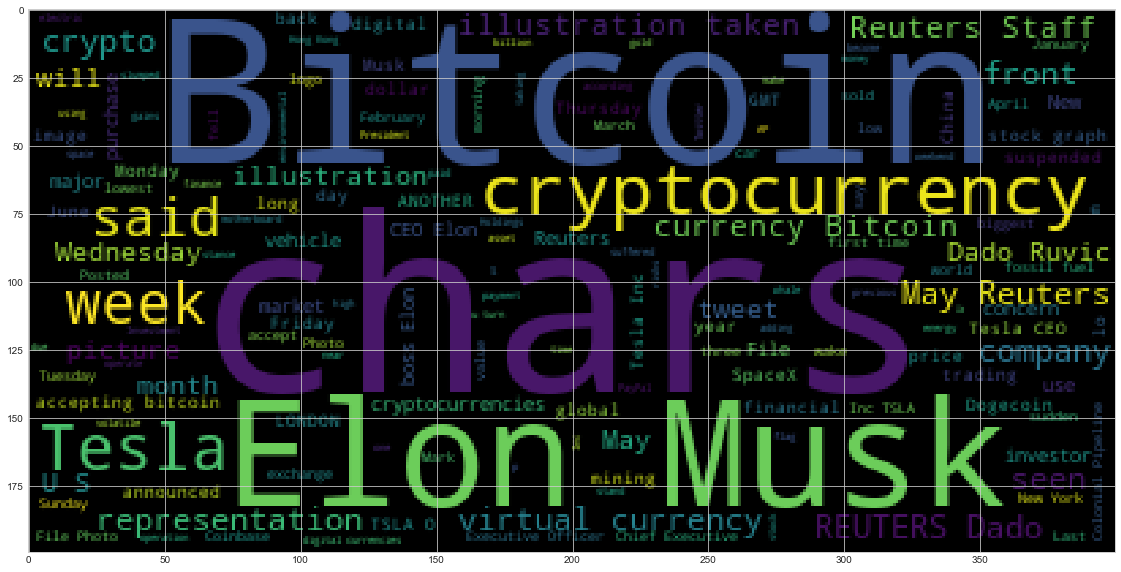

In [88]:
# Generate the Bitcoin word cloud
btc_string = ' '.join(btc_df['text'])
btc_wc = WordCloud().generate(btc_string)
plt.imshow(btc_wc)

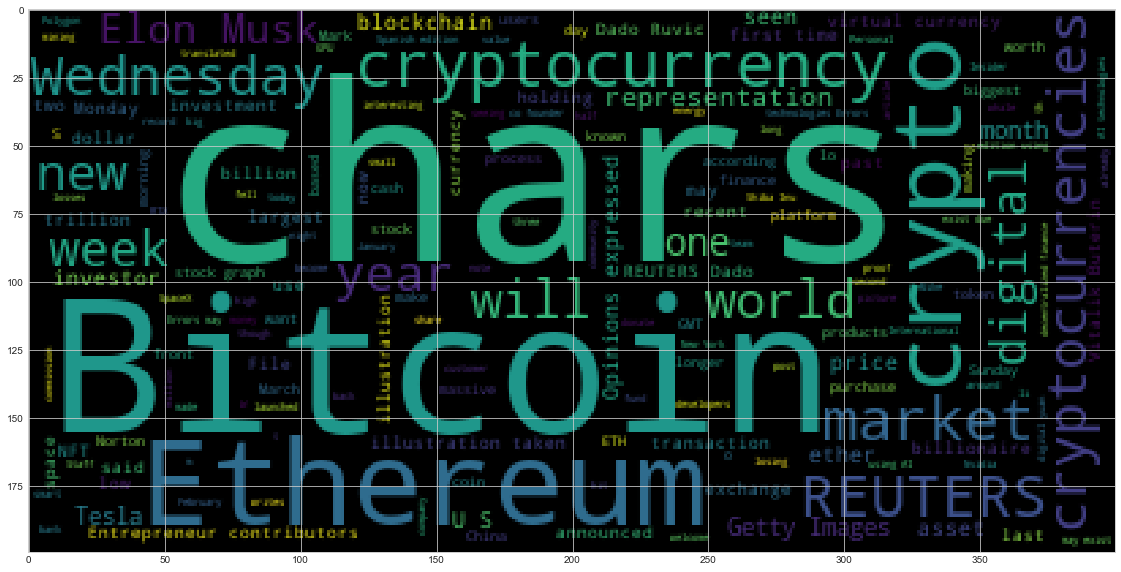

In [89]:
# Generate the Ethereum word cloud
eth_string = ' '.join(eth_df['text'])
eth_wc = WordCloud().generate(eth_string)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [71]:
import spacy
from spacy import displacy

In [23]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [72]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [74]:
# Concatenate all of the Bitcoin text together
concat_btc = btc_df['text'].str.cat(sep=', ')

In [75]:
# Run the NER processor on all of the text
btc_ner = nlp(concat_btc)

# Add a title to the document
btc_ner.user_data["title"] = "BTC NER"

In [76]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [80]:
# List all Entities
btc_ner.ents

(Just weeks,
 Tesla,
 Bitcoin,
 Elon Musk,
 Tesla,
 Elon Musk,
 Alex Castro,
 The Verge
 
  
 
  Cryptocurrency,
 Coinbase,
 this morning,
 Coinbase,
 Bin,
 Last week,
 Musk,
 Dogecoin,
 Mark Zuckerberg,
 two,
 Max,
 Bitcoin,
 Elon Musk,
 March,
 Musk,
 Tesla,
 Earlier this year,
 EV,
 1.5,
 Elon Musk,
 Bitcoin,
 Bitcoin,
 Altcoins,
 Tuesday night,
 Wednesday,
 morning,
 months,
 hundreds of billions,
 Three years,
 Babel Finance,
 Monday,
 hours-long,
 this morning,
 May 19th,
 Last week,
 Disney,
 This week,
 Tec,
 PayPals,
 Wednesday,
 Jose Fernandez da Pontethe,
 more than 5,500 miles,
 the United States,
 Mary-Ann RussonBusiness,
 BBC News,
 US,
 Donald Trump,
 Fox Business,
 Bitcoin,
 US,
 Photo,
 Michele Doying,
 Verge,
 Iran,
 Last week,
 Trump,
 This week,
 Elon Musk’s,
 Elon Musk,
 Dogecoin,
 Twitter,
 Australian,
 London High Court,
 16,
 around 4 billion pounds,
 Bitcoin,
 U.S.,
 January 8, 2021,
 Dado Ruvic/File PhotoTesla Inc,
 Bitcoin,
 about $50,000,
 Asian,
 Thursday,


---

### Ethereum NER

In [81]:
# Concatenate all of the Ethereum text together
concat_eth = eth_df['text'].str.cat(sep=', ')

In [82]:
# Run the NER processor on all of the text
eth_ner = nlp(concat_eth)

# Add a title to the document
eth_ner.user_data["title"] = "ETH NER"

In [83]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [84]:
# List all Entities
eth_ner.ents

(Vitalik Buterin,
 Ethereum,
 Wednesday,
 Ethereum,
 $1.5 billion,
 Buterin,
 500,
 ETH,
 Solana,
 Anatoly Yakovenko,
 Altcoins,
 Tuesday night,
 Wednesday,
 morning,
 months,
 hundreds of billions,
 Ethereum,
 February 19, 2021,
 GPU,
 Alex Castro,
 The Verge
 
  
 
  Cryptocurrency,
 Coinbase,
 this morning,
 Coinbase,
 Bin,
 Bitcoin,
 Ethereum,
 Getty Images,
 AsiaPac,
 Bitcoin,
 Ethereum,
 number two,
 2021,
 Ethereum,
 99.95%,
 Carl Beekhuizen,
 the Ethereum Foundation,
 Beekhuizen,
 tomorrow,
 Norton,
 Norton,
 Norton Crypto,
 Bitcoin,
 U.S. Dollar,
 May 26, 2020,
 Dado Ruvic/File PhotoBitcoin,
 last week,
 Bitcoin,
 one-day,
 March last year,
 Wednesday,
 $1 trillion,
 Wednesday,
 Entrepreneur,
 March 2021,
 more than one million,
 SafeMoon,
 about one hundred billion trillion dollars,
 CryptoPunks,
 decades,
 Ill,
 Jacks,
 Cristina CriddleTechnology,
 Kim Catdarshian,
 Ethereum,
 Ethereum,
 February 19, 2021,
 Dado Ruvic/IllustrationCryptocurrency,
 4,000,
 Spanish,
 AI,
 This 

---